# Working with data 2017. Class 7a
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## Groupby

In [2]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np

def read_our_csv():
    #reading the raw data from oecd
    df = pd.read_csv("../4_TidyData/data/CITIES_19122016195113034.csv",sep="\t")

    #fixing the columns (the first one is ""METRO_ID"" instead of "METRO_ID")
    cols = list(df.columns)
    cols[0] = "METRO_ID"
    df.columns = cols
    
    #pivot the table
    column_with_values = "Value"
    column_to_split = ["VAR"]
    variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
    df_fixed = df.pivot_table(column_with_values,
                 variables_already_present,
                 column_to_split).reset_index()
    
    return df_fixed
    

# 5. Groupby and in-class exercises
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

For instance, if we have data on temperatures by country and month and we want to calculate the mean temperature for each country:
- We split the data by country
- We calculate the mean for each group
- We combine all of it. 

Luckily, python can make this easier (in one line).

## 5.1 Describe the data by a variable

In [6]:
df = read_our_csv()
df["country"] = df["METRO_ID"].str.slice(0,2)
df = df.loc[:,["METRO_ID","country","CO2_PC","GDP_PC","Year"]]

In [7]:
df.head()

VAR,METRO_ID,country,CO2_PC,GDP_PC,Year
0,AT001,AT,12.77,45434.48,2000
1,AT001,AT,NaN,45479.15,2001
2,AT001,AT,NaN,46065.50,2002
3,AT001,AT,NaN,45470.92,2003
4,AT001,AT,NaN,46148.38,2004


In [23]:
df.groupby(["country"]).describe()

VAR     CO2_PC                                                                \
         count       mean        std    min      25%     50%      75%    max   
country                                                                        
AT         9.0  13.738889   2.531222  10.23  11.9900  14.230  15.4200  17.58   
AU        24.0  10.263750   4.501395   3.63   7.7600   9.455  11.0775  20.19   
BE        15.0  13.248667   3.017873   9.48  11.1650  12.010  15.5800  19.00   
CA        30.0  20.724667  12.358822  12.48  13.9925  14.880  17.9625  52.10   
CH        15.0   5.448667   0.990381   3.77   4.7850   5.460   6.3000   6.76   
CL         9.0   2.930000   0.532024   2.16   2.3500   3.170   3.3500   3.42   
CZ        12.0  11.219167   2.464377   7.76   9.1525  11.300  13.1275  15.19   
DE        75.0  13.496800   7.184813   4.96   6.9600  11.110  20.9450  29.69   
DK         3.0   7.246667   0.186100   7.05   7.1600   7.270   7.3450   7.42   
DN         3.0   9.040000   0.330454   8.82   8.8500   8.880   9.1500   9.42   
EE         3.0   7.173333   0.515396   6.67   6.9100   7.150   7.4250   7.70   
ES        30.0   6.880667   3.416413   3.00   5.2800   5.885   7.1775  16.70   
FI         6.0  17.938333   2.434579  15.61  15.7650  17.945  20.1625  20.19   
FR        48.0   7.465625   3.557383   3.73   5.9350   6.795   7.2500  20.89   
GB         3.0   8.983333   0.298385   8.64   8.8850   9.130   9.1550   9.18   
GR         9.0   5.760000   2.041556   3.64   4.1600   5.100   8.1600   8.62   
HU         6.0   7.921667   2.064669   5.98   6.0775   7.805   9.4800  10.40   
IE         3.0  12.426667   0.328684  12.13  12.2500  12.370  12.5750  12.78   
IR         3.0  12.783333   0.611746  12.10  12.5350  12.970  13.1250  13.28   
IT        36.0   8.287222   6.045277   2.31   5.2300   7.160   8.8175  29.05   
JP       111.0   7.705315   5.144873   2.65   4.3350   5.610   8.6950  24.23   
KO         3.0   9.683333   0.684130   8.96   9.3650   9.770  10.0450  10.32   
KR        30.0   9.097000   9.435885   2.87   4.0625   5.380   6.0275  33.90   
ME       102.0   2.759706   2.131155   0.70   1.4700   2.405   3.2825  15.38   
NL        18.0  10.802778   4.443593   5.86   6.9300   9.480  15.6000  18.69   
NO         6.0  11.463333   3.469511   8.19   8.3500  11.475  14.6075  14.68   
PL        24.0   8.060417   2.861005   4.70   6.2150   7.460   9.0725  14.02   
PO         3.0   8.780000   0.476970   8.28   8.5550   8.830   9.0300   9.23   
PR         3.0   5.293333   0.484286   4.74   5.1200   5.500   5.5700   5.64   
PT         6.0   5.470000   0.514315   4.64   5.2225   5.590   5.8150   6.01   
SE         9.0   7.244444   0.715858   6.17   6.8100   7.210   7.5100   8.30   
SI         3.0   7.330000   0.086603   7.28   7.2800   7.280   7.3550   7.43   
SK         3.0  10.553333   0.505800   9.97  10.3950  10.820  10.8450  10.87   
SV         6.0   9.648333   1.721098   8.07   8.1550   9.275  11.1525  11.71   
SW         3.0   7.496667   0.472264   7.00   7.2750   7.550   7.7450   7.94   
UK        45.0   8.479111   5.421090   3.30   5.3200   6.230   8.9000  21.04   
US       213.0  16.774836   6.117279   5.99  12.4300  15.160  19.8500  37.45   

VAR     GDP_PC                 ...                            Year          \
         count          mean   ...           75%       max   count    mean   
country                        ...                                           
AT        39.0  43837.259487   ...    46299.3200  48755.43    45.0  2007.0   
AU       112.0  41055.880268   ...    42087.6000  67662.15   120.0  2007.0   
BE        70.0  39659.660714   ...    45945.3325  54631.33    75.0  2007.0   
CA       140.0  42688.981214   ...    42234.8600  71263.74   150.0  2007.0   
CH        34.0  39427.357647   ...    54161.8550  63433.63    75.0  2007.0   
CL        42.0  15367.136667   ...    17791.0625  26321.75    45.0  2007.0   
CZ        56.0  27881.651071   ...    29617.1975  50014.62    60.0  2007.0   
DE       326.0  411

## 5.2 Calculate the mean for every variable, as a function of each country


In [8]:
df.groupby(["METRO_ID","country"]).mean() #or .median() or .skew() or .std() or .max()...

,VAR,CO2_PC,GDP_PC,Year
METRO_ID,country,,,
AT001,AT,14.140000,46795.176923,2007
AT002,AT,10.970000,41208.465385,2007
AT003,AT,16.106667,43508.136154,2007
AUS,AU,19.856667,40941.437857,2007
AUS01,AU,9.426667,40864.276429,2007
AUS02,AU,10.610000,38635.655714,2007
AUS03,AU,12.846667,39216.628571,2007
AUS04,AU,7.720000,53265.953571,2007
AUS05,AU,7.813333,35516.405000,2007


In [10]:
df.groupby(["country"]).max()

VAR,METRO_ID,CO2_PC,GDP_PC,Year
country,,,,
AT,AT003,17.58,48755.43,2014
AU,AUT,20.19,67662.15,2014
BE,BEL,19.00,54631.33,2014
CA,CAN29,52.10,71263.74,2014
CH,CHL,6.76,63433.63,2014
CL,CL020,3.42,26321.75,2014
CZ,CZE,15.19,50014.62,2014
DE,DEU,29.69,64839.76,2014
DK,DK001,7.42,49521.96,2014


## 5.3 Iterate over the gropus


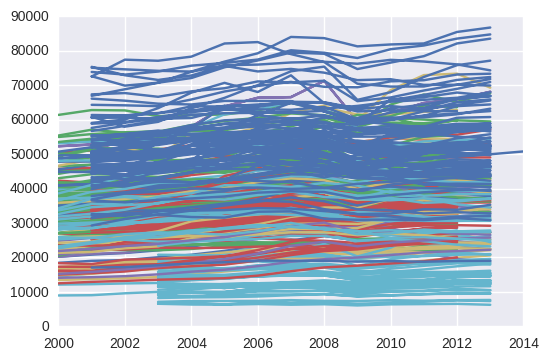

In [11]:
for country,data in df.groupby(["country"]):
    print(country)
    display(data.head())
    